### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
facturacion_tienda1 = tienda["Precio"].sum()
facturacion_tienda2 = tienda2["Precio"].sum()
facturacion_tienda3 = tienda3["Precio"].sum()
facturacion_tienda4 = tienda4["Precio"].sum()

print(f"facturacion total de tienda 1: $ {facturacion_tienda1:.2f}")
print(f"facturacion total de tienda 2: $ {facturacion_tienda2:.2f}")
print(f"facturacion total de tienda 3: $ {facturacion_tienda3:.2f}")
print(f"facturacion total de tienda 4: $ {facturacion_tienda4:.2f}")


facturacion total de tienda 1: $ 1150880400.00
facturacion total de tienda 2: $ 1116343500.00
facturacion total de tienda 3: $ 1098019600.00
facturacion total de tienda 4: $ 1038375700.00


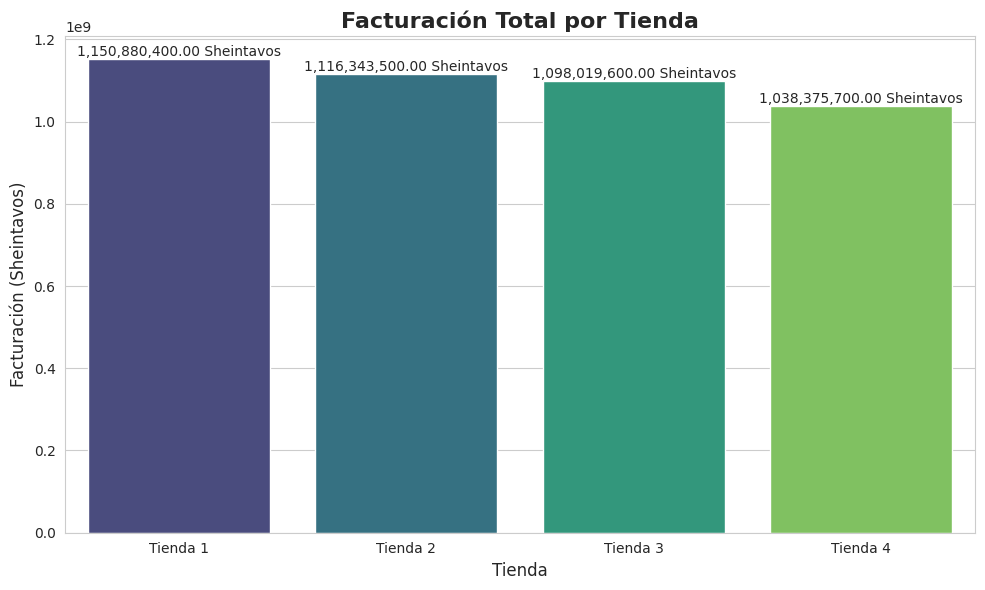

In [4]:
# importando las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# creando un dataframe para que seaborn pueda generar el gráfico
df_facturacion = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturación": [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
})

# definiendo el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# generando el gráfico de barras y definiendo la paleta de colores
sns.barplot(x="Tienda", y="Facturación", data=df_facturacion, hue="Tienda", palette="viridis", dodge=False, legend=False)

# definiendo el título y el nombre de los ejes
plt.title("Facturación Total por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Facturación (Sheintavos)", fontsize=12)

# agregando las etiquetas de valores
for index, row in df_facturacion.iterrows():
    plt.text(index, row["Facturación"] + 500, f"{row['Facturación']:,.2f} Sheintavos",
             ha='center', va='bottom', fontsize=10)

# ajustando el layout y mostrando el gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [5]:
# agrupando y contando las categorías de los productos vendidos por cada tienda
categorias_tienda1 = tienda.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad")
categorias_tienda2 = tienda2.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad")
categorias_tienda3 = tienda3.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad")
categorias_tienda4 = tienda4.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad")

# mostrando las categorías más populares de cada tienda (del mayor al menor)
print("Categorías más populares - Tienda 1:")
print(categorias_tienda1.sort_values(by="Cantidad", ascending=False), "\n")

print("Categorías más populares - Tienda 2:")
print(categorias_tienda2.sort_values(by="Cantidad", ascending=False), "\n")

print("Categorías más populares - Tienda 3:")
print(categorias_tienda3.sort_values(by="Cantidad", ascending=False), "\n")

print("Categorías más populares - Tienda 4:")
print(categorias_tienda4.sort_values(by="Cantidad", ascending=False))

Categorías más populares - Tienda 1:
    Categoría del Producto  Cantidad
7                  Muebles       465
3             Electrónicos       448
5                 Juguetes       324
2        Electrodomésticos       312
1     Deportes y diversión       284
4   Instrumentos musicales       182
6                   Libros       173
0  Artículos para el hogar       171 

Categorías más populares - Tienda 2:
    Categoría del Producto  Cantidad
7                  Muebles       442
3             Electrónicos       422
5                 Juguetes       313
2        Electrodomésticos       305
1     Deportes y diversión       275
4   Instrumentos musicales       224
6                   Libros       197
0  Artículos para el hogar       181 

Categorías más populares - Tienda 3:
    Categoría del Producto  Cantidad
7                  Muebles       499
3             Electrónicos       451
5                 Juguetes       315
2        Electrodomésticos       278
1     Deportes y diversión       2

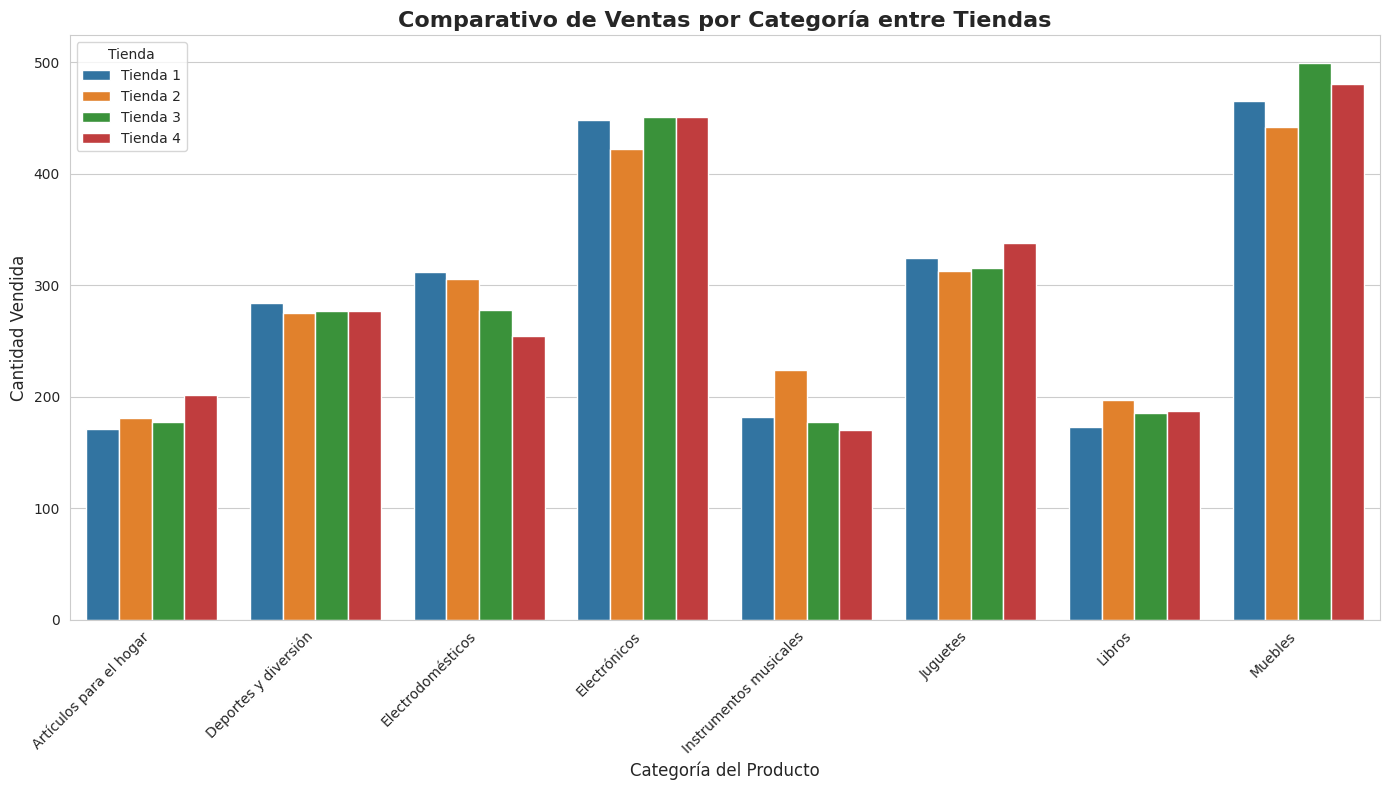

In [6]:
# importando las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# creando la columna que identifica cada tienda
categorias_tienda1["Tienda"] = "Tienda 1"
categorias_tienda2["Tienda"] = "Tienda 2"
categorias_tienda3["Tienda"] = "Tienda 3"
categorias_tienda4["Tienda"] = "Tienda 4"

# concatenando los dataframes
todas_categorias = pd.concat([categorias_tienda1, categorias_tienda2, categorias_tienda3, categorias_tienda4])

# definiendo el estilo y el tamaño del gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# generando el gráfico de barras comparativo
sns.barplot(data=todas_categorias, x="Categoría del Producto", y="Cantidad", hue="Tienda")

# ajustando el layout
plt.title("Comparativo de Ventas por Categoría entre Tiendas", fontsize=16, fontweight="bold")
plt.xlabel("Categoría del Producto", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tienda")
plt.tight_layout()

# mostrando el gráfico
plt.show()

# 3. Calificación promedio de la tienda


In [7]:
# calculando el promedio de las calificaciones de cada tienda
promedio_calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# transformando en dataframe para poder generar la visualización
df_calificaciones = pd.DataFrame(list(promedio_calificaciones.items()), columns=["Tienda", "Promedio de Calificación"])
df_calificaciones["Promedio de Calificación"] = df_calificaciones["Promedio de Calificación"].round(2)

# mostrando los promedios
print(df_calificaciones)

     Tienda  Promedio de Calificación
0  Tienda 1                      3.98
1  Tienda 2                      4.04
2  Tienda 3                      4.05
3  Tienda 4                      4.00


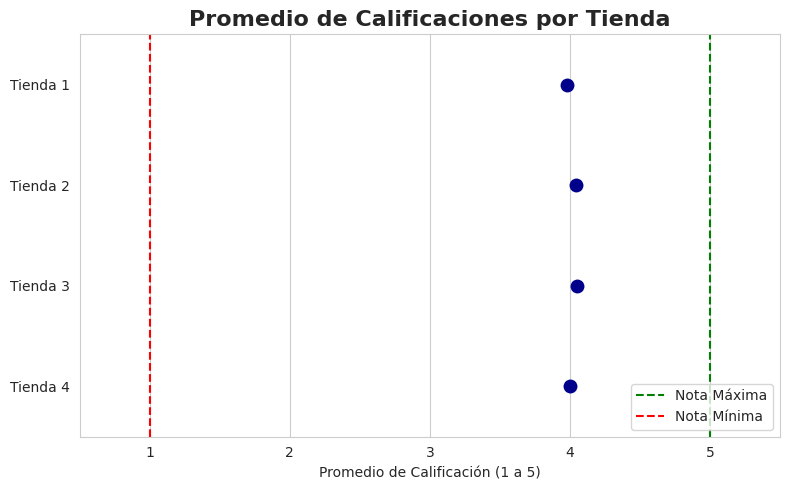

In [8]:
# importando las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# definiendo el estilo y tamaño del gráfico
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# generando el gráfico de puntos y definiendo los colores
sns.stripplot(data=df_calificaciones, x="Promedio de Calificación", y="Tienda", size=10, color="darkblue")

# agregando líneas de referencia
plt.axvline(5, color='green', linestyle='--', label='Nota Máxima')
plt.axvline(1, color='red', linestyle='--', label='Nota Mínima')

# agregando rótulos y títulos
plt.title("Promedio de Calificaciones por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Promedio de Calificación (1 a 5)")
plt.ylabel("")

# ajustando el layout y mostrando el gráfico
plt.xlim(0.5, 5.5)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [9]:
# identificando el producto más y menos vendido por tienda

productos_tienda1 = tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda1 = productos_tienda1.sort_values(by="Cantidad Vendida", ascending=False)

productos_tienda2 = tienda2.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda2 = productos_tienda2.sort_values(by="Cantidad Vendida", ascending=False)

productos_tienda3 = tienda3.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda3 = productos_tienda3.sort_values(by="Cantidad Vendida", ascending=False)

productos_tienda4 = tienda4.groupby("Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
productos_tienda4 = productos_tienda4.sort_values(by="Cantidad Vendida", ascending=False)

# mostrando los cinco productos más vendidos y los cinco menos vendidos por tienda
print("Tienda 1 - Productos más y menos vendidos:")
print("Más vendidos:")
print(productos_tienda1.head(5))
print("Menos vendidos:")
print(productos_tienda1.tail(5), "\n")

print("Tienda 2 - Productos más y menos vendidos:")
print("Más vendidos:")
print(productos_tienda2.head(5))
print("Menos vendidos:")
print(productos_tienda2.tail(5), "\n")

print("Tienda 3 - Productos más y menos vendidos:")
print("Más vendidos:")
print(productos_tienda3.head(5))
print("Menos vendidos:")
print(productos_tienda3.tail(5), "\n")

print("Tienda 4 - Productos más y menos vendidos:")
print("Más vendidos:")
print(productos_tienda4.head(5))
print("Menos vendidos:")
print(productos_tienda4.tail(5))

Tienda 1 - Productos más y menos vendidos:
Más vendidos:
            Producto  Cantidad Vendida
1            Armario                60
48     TV LED UHD 4K                60
33        Microondas                60
40  Secadora de ropa                58
32     Mesa de noche                56
Menos vendidos:
                     Producto  Cantidad Vendida
34                    Mochila                39
38                  Pandereta                36
37            Olla de presión                35
13               Celular ABXY                33
4   Auriculares con micrófono                33 

Tienda 2 - Productos más y menos vendidos:
Más vendidos:
                     Producto  Cantidad Vendida
24  Iniciando en programación                65
33                 Microondas                62
7                     Batería                61
38                  Pandereta                58
21          Guitarra acústica                58
Menos vendidos:
           Producto  Cantidad Vendida
3   

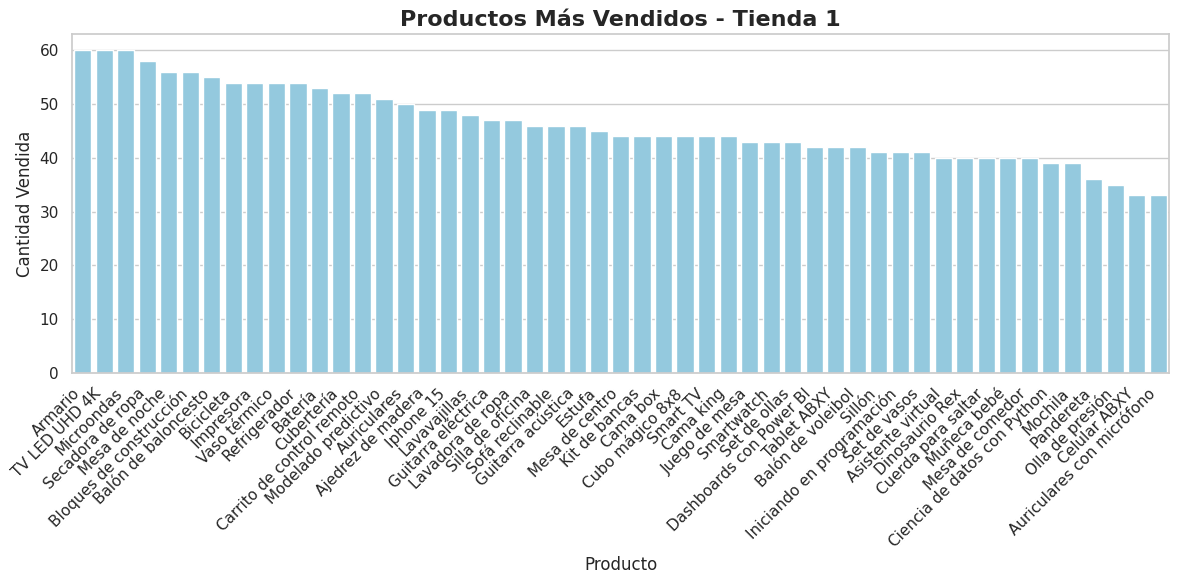

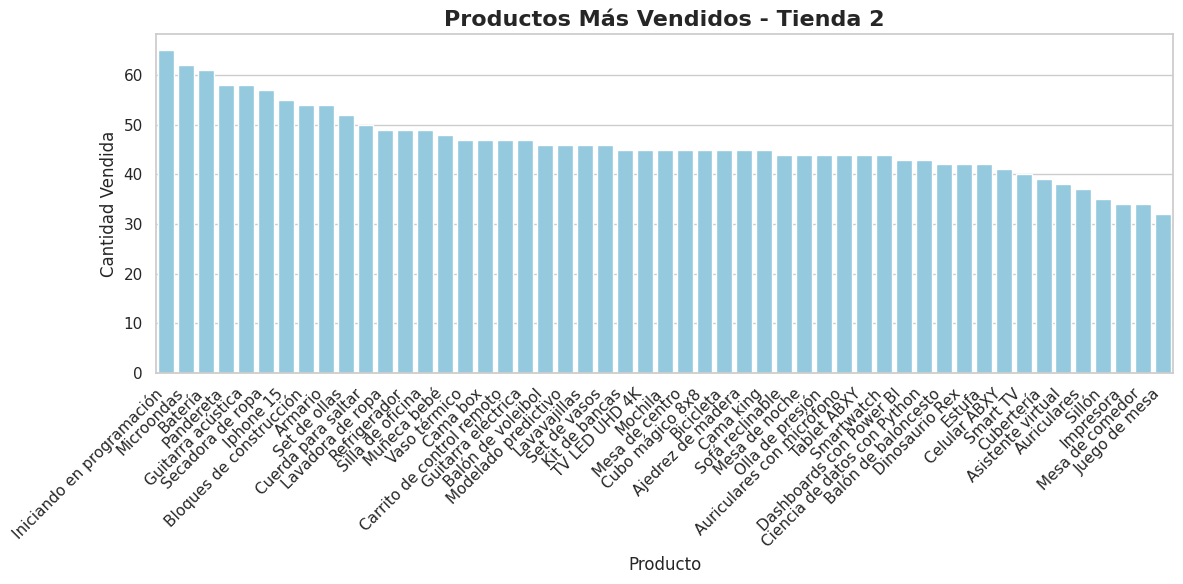

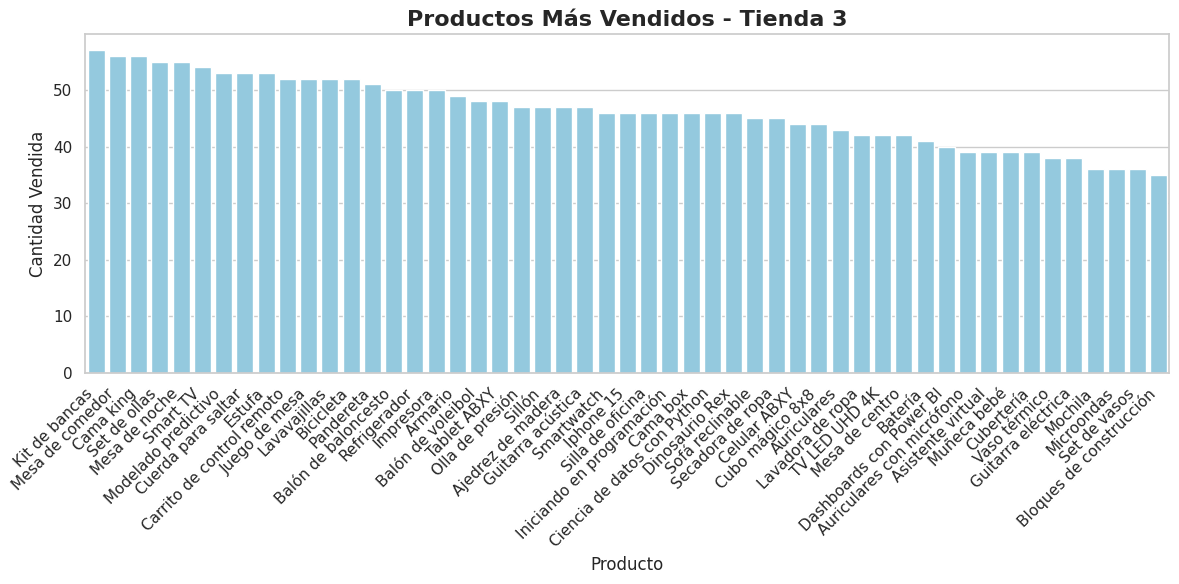

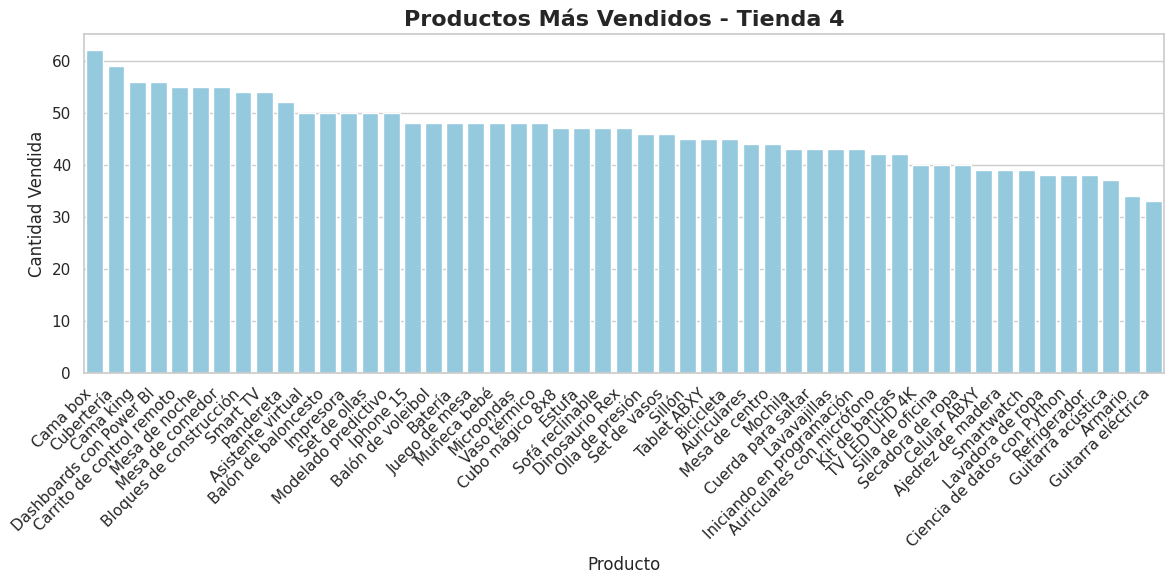

In [10]:
# importando las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# definiendo el tamaño y estilo del gráfico
def grafico_barras(tienda_data, nombre_tienda):
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    # creando el gráfico de barras
    sns.barplot(x="Producto", y="Cantidad Vendida", data=tienda_data, color="skyblue")

    # ajustando el layout y agregando los títulos
    plt.title(f"Productos Más Vendidos - {nombre_tienda}", fontsize=16, fontweight="bold")
    plt.xlabel("Producto", fontsize=12)
    plt.ylabel("Cantidad Vendida", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# generando un gráfico para cada tienda
grafico_barras(productos_tienda1, "Tienda 1")
grafico_barras(productos_tienda2, "Tienda 2")
grafico_barras(productos_tienda3, "Tienda 3")
grafico_barras(productos_tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [11]:
# calculando el promedio del costo de envío de cada tienda
promedio_envio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# generando dataframe para poder hacer la visualización
df_envio = pd.DataFrame(list(promedio_envio.items()), columns=["Tienda", "Costo Promedio de Envío"])
df_envio["Costo Promedio de Envío"] = df_envio["Costo Promedio de Envío"].round(2)

# mostrando el resultado del promedio
print(df_envio)

     Tienda  Costo Promedio de Envío
0  Tienda 1                 26018.61
1  Tienda 2                 25216.24
2  Tienda 3                 24805.68
3  Tienda 4                 23459.46


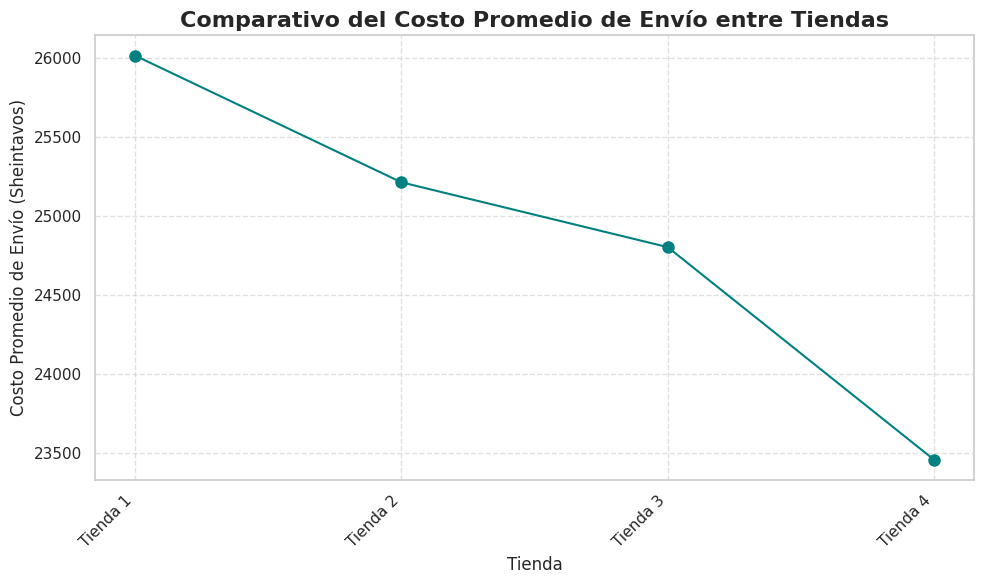

In [12]:
# importando la biblioteca necesaria
import matplotlib.pyplot as plt

# definiendo el tamaño del gráfico
plt.figure(figsize=(10, 6))

# generando el gráfico de líneas
plt.plot(df_envio["Tienda"], df_envio["Costo Promedio de Envío"], marker="o", linestyle='-', color="teal", markersize=8)

# agregando el título y los rótulos
plt.title("Comparativo del Costo Promedio de Envío entre Tiendas", fontsize=16, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo Promedio de Envío (Sheintavos)", fontsize=12)

# ajustando el layout
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# mostrando el gráfico
plt.show()